$$\Large \textit{C0708 | Reconocimiento de Patrones}$$

$$\large \textbf{Challenge N°4| Visualización, pre-procesamiento y procesamiento de datos}$$



### Grupo N°4:

- Alonso Santiago Morán Espinoza
- Sergio Enrique Moreno Elescano

## Carga de dataset y librerias

1) El primer paso para la resolución del ejercicio práctico es la carga de librerías y el dataset denominado "ADMISSIONS.csv" utilizando la libtería pandas

In [1]:
# Importación de librerías

import pandas as pd
import numpy
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn import preprocessing

# Visualizamos los encabezados junto a los valores de cada columna
# Hacemos uso de la variable df_cancer

df_admin = pd.read_csv("ADMISSIONS.csv")
df_admin.head()


,row_id,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,religion,marital_status,ethnicity,edregtime,edouttime,diagnosis,hospital_expire_flag,has_chartevents_data
0,12258,10006,142345,2164-10-23 21:09:00,2164-11-01 17:15:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,SEPARATED,BLACK/AFRICAN AMERICAN,2164-10-23 16:43:00,2164-10-23 23:00:00,SEPSIS,0,1
1,12263,10011,105331,2126-08-14 22:32:00,2126-08-28 18:59:00,2126-08-28 18:59:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Private,NaN,CATHOLIC,SINGLE,UNKNOWN/NOT SPECIFIED,NaN,NaN,HEPATITIS B,1,1
2,12265,10013,165520,2125-10-04 23:36:00,2125-10-07 15:13:00,2125-10-07 15:13:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,NaN,CATHOLIC,NaN,UNKNOWN/NOT SPECIFIED,NaN,NaN,SEPSIS,1,1
3,12269,10017,199207,2149-05-26 17:19:00,2149-06-03 18:42:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,NaN,CATHOLIC,DIVORCED,WHITE,2149-05-26 12:08:00,2149-05-26 19:45:00,HUMERAL FRACTURE,0,1
4,12270,10019,177759,2163-05-14 20:43:00,2163-05-15 12:00:00,2163-05-15 12:00:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,NaN,CATHOLIC,DIVORCED,WHITE,NaN,NaN,ALCOHOLIC HEPATITIS,1,1


## Análisis preliminar de los datos

Se pueden observar que hay 19 columnas que muestran todos los datos del archivo, a continuación se menciona cada una de ellas y una breve descripción de la información que contiene. Para esto se consultaron las siguientes fuentes:

- Johnson, A., Pollard, T., Shen, L. et al. MIMIC-III, a freely accessible critical care database. Sci Data 3, 160035 (2016). https://doi.org/10.1038/sdata.2016.35
- K, A. (2022, April 7). Mimic-III - deep reinforcement learning. Kaggle. https://www.kaggle.com/datasets/asjad99/mimiciii?datasetId=2061039&amp;sortBy=dateRun&amp;tab=collaboration 

A continuación se muestran las características.

- admittime: Esta columna abarca los datos correspondientes a la hora de ingreso del paciente a la unidad de cuidados intensivos.
- dischtime: Esta columna abarca los datos que muestran la hora de descarga del paciente.
- deathtime: Esta columna muestra la hora de fallecimiento, de ser el caso, de los pacientes.
- admission_type: Esta columna muestra la informacion correspondiente al modo de admisión a la unidad de cuidados intensivos.
- discharge_location: Esta columna está compuesta por los datos que indican a que módulo fue descargado el paciente, para el caso de los fallecidos se usa la etiqueta "DEAD/EXPIRED"
- insurance: Esta columna describe el tipo de seguro del paciente.
- language: Esta columna muestra el idioma que cada paciente habla.
- religion: Esta columna abarca datos relacionados a la religión de cada paciente.
- marital_status: Esta columna indica el estado civil de cada paciente.
- ethnicity: En esta columna se carga la información relacionada a la raza del paciente.
- diagnosis: En esta columna se muestra el diagnóstico de cada paciente.


## Análisis Exploratorio

2. Ahora se ingresará la información contenida en la variable df_cancer que corresponde a cada columna, se verifica la cantidad de valores que no son nulos.

In [2]:
# Se imprime la información de cada columna

print(df_admin.info())
df_admin.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   row_id                129 non-null    int64 
 1   subject_id            129 non-null    int64 
 2   hadm_id               129 non-null    int64 
 3   admittime             129 non-null    object
 4   dischtime             129 non-null    object
 5   deathtime             40 non-null     object
 6   admission_type        129 non-null    object
 7   admission_location    129 non-null    object
 8   discharge_location    129 non-null    object
 9   insurance             129 non-null    object
 10  language              81 non-null     object
 11  religion              128 non-null    object
 12  marital_status        113 non-null    object
 13  ethnicity             129 non-null    object
 14  edregtime             92 non-null     object
 15  edouttime             92 non-null     ob

,row_id,subject_id,hadm_id,hospital_expire_flag,has_chartevents_data
count,129.000000,129.000000,129.000000,129.000000,129.000000
mean,28036.441860,28010.410853,152343.441860,0.310078,0.992248
std,14036.548988,16048.502883,27858.788248,0.464328,0.088045
min,12258.000000,10006.000000,100375.000000,0.000000,0.000000
25%,12339.000000,10088.000000,128293.000000,0.000000,1.000000
50%,39869.000000,40310.000000,157235.000000,0.000000,1.000000
75%,40463.000000,42135.000000,174739.000000,1.000000,1.000000
max,41092.000000,44228.000000,199395.000000,1.000000,1.000000


Se puede observar que hay ciertos datos nulos en el archivo a trabajar. Más adelante se propondrá una estrategia para lidiar con est etipo de datos.
A continuación se evalua el balance de la información con la que se cuenta y su relación con el target propuesto, es decir, si es que se ha expirado el registro del paciente en la unidad de cuidados intensivos. Consideramos esta columna como el target ya que indica el caso de fallecimiento.
Para esto se muestra un histograma utilizando la columna de target.

3) Evalua si la data esta balanceada para el target propuesto. Comenta tus resultados

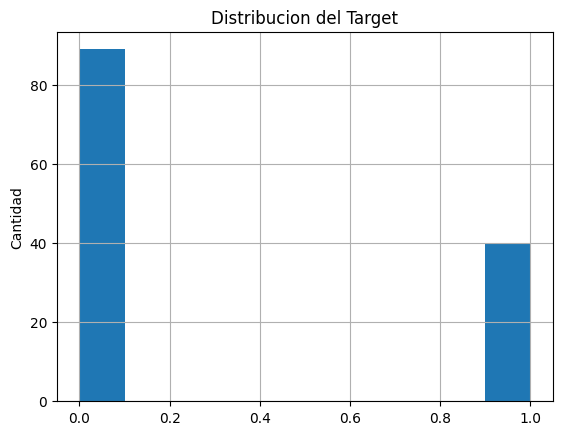

In [3]:
plt.hist(df_admin['hospital_expire_flag'])
plt.title('Distribucion del Target')
plt.grid()
plt.ylabel("Cantidad")
plt.show()

Analizando el Histograma podemos concluir que si se podrá trabjar con los datos. Hay una distribucion conveniente de los casos de sobrevivencia y fallecimiento.

## Visualización de la data

A continuación, se propone un análasis visual más profundo de los datos propuestos. Para esto se observará lo siguiente:

- Distribución de cada variable
- Relación existente entre las variables
- Outlier en las variables

Este paso resulta fundamental para posteriormente procesar los datos según sea necesario.

### Distribucion de las variables

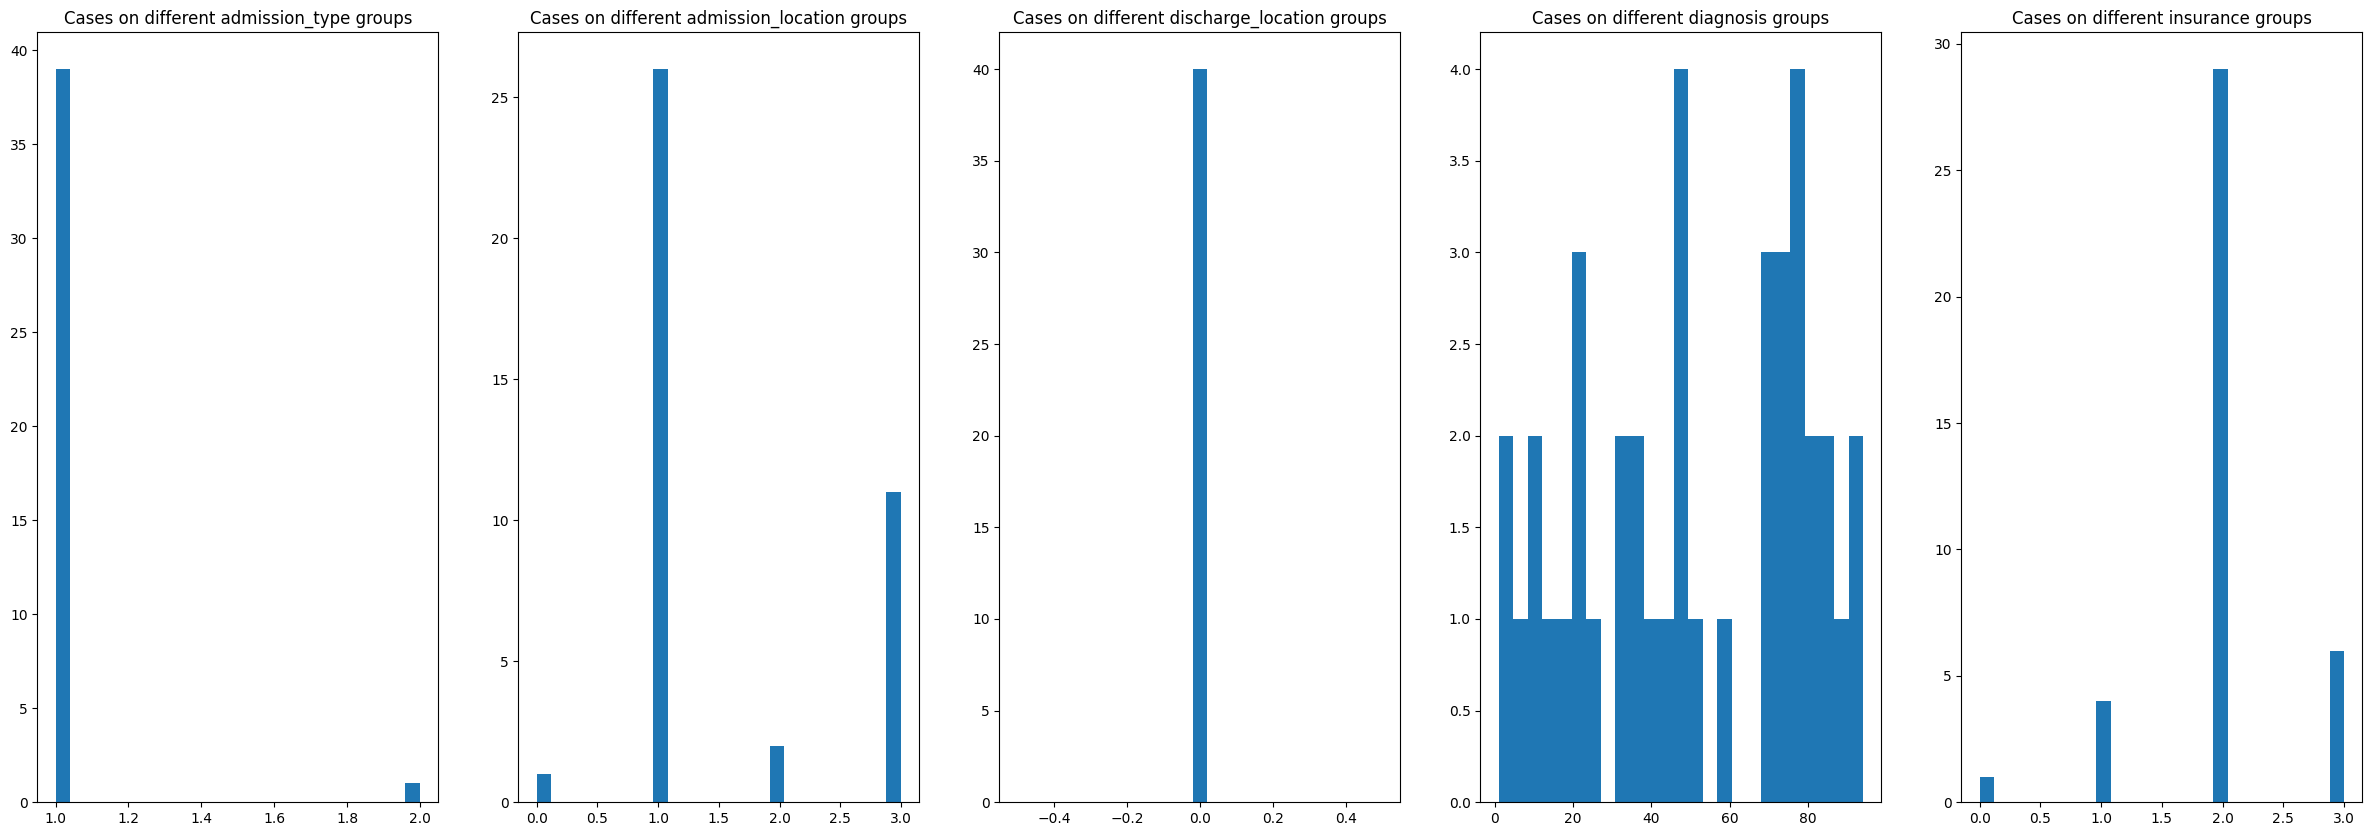

In [4]:
# Almacenamos en la variable 'fallecidos' a los pacientes cuyo registro en el hospital a expirado
#import label encoder
from sklearn import preprocessing
#make an instance of Label Encoder
label_encoder = preprocessing.LabelEncoder()
df_admin['admission_type'] = label_encoder.fit_transform(df_admin['admission_type'])
df_admin['admission_location'] = label_encoder.fit_transform(df_admin['admission_location'])
df_admin['discharge_location'] = label_encoder.fit_transform(df_admin['discharge_location'])
df_admin['diagnosis'] = label_encoder.fit_transform(df_admin['diagnosis'])
df_admin['insurance'] = label_encoder.fit_transform(df_admin['insurance'])
df_admin['admittime'] = label_encoder.fit_transform(df_admin['admittime'])
df_admin['dischtime'] = label_encoder.fit_transform(df_admin['dischtime'])
df_admin['deathtime'] = label_encoder.fit_transform(df_admin['deathtime'])
df_admin['language'] = label_encoder.fit_transform(df_admin['language'])
df_admin['religion'] = label_encoder.fit_transform(df_admin['religion'])
df_admin['marital_status'] = label_encoder.fit_transform(df_admin['marital_status'])
df_admin['ethnicity'] = label_encoder.fit_transform(df_admin['ethnicity'])
df_admin['edregtime'] = label_encoder.fit_transform(df_admin['edregtime'])
df_admin['edouttime'] = label_encoder.fit_transform(df_admin['edouttime'])
fallecidos = df_admin[df_admin['hospital_expire_flag'] == 1]


fig, axs = plt.subplots(1, 5, figsize=(30, 10))

count = 0
for feature in ['admission_type', 'admission_location', 'discharge_location', 'diagnosis','insurance']:
    axs[count].hist(fallecidos[feature], bins=25)
    axs[count].set_title(('Cases on different ' +  feature + ' groups'))
    count += 1

plt.show()

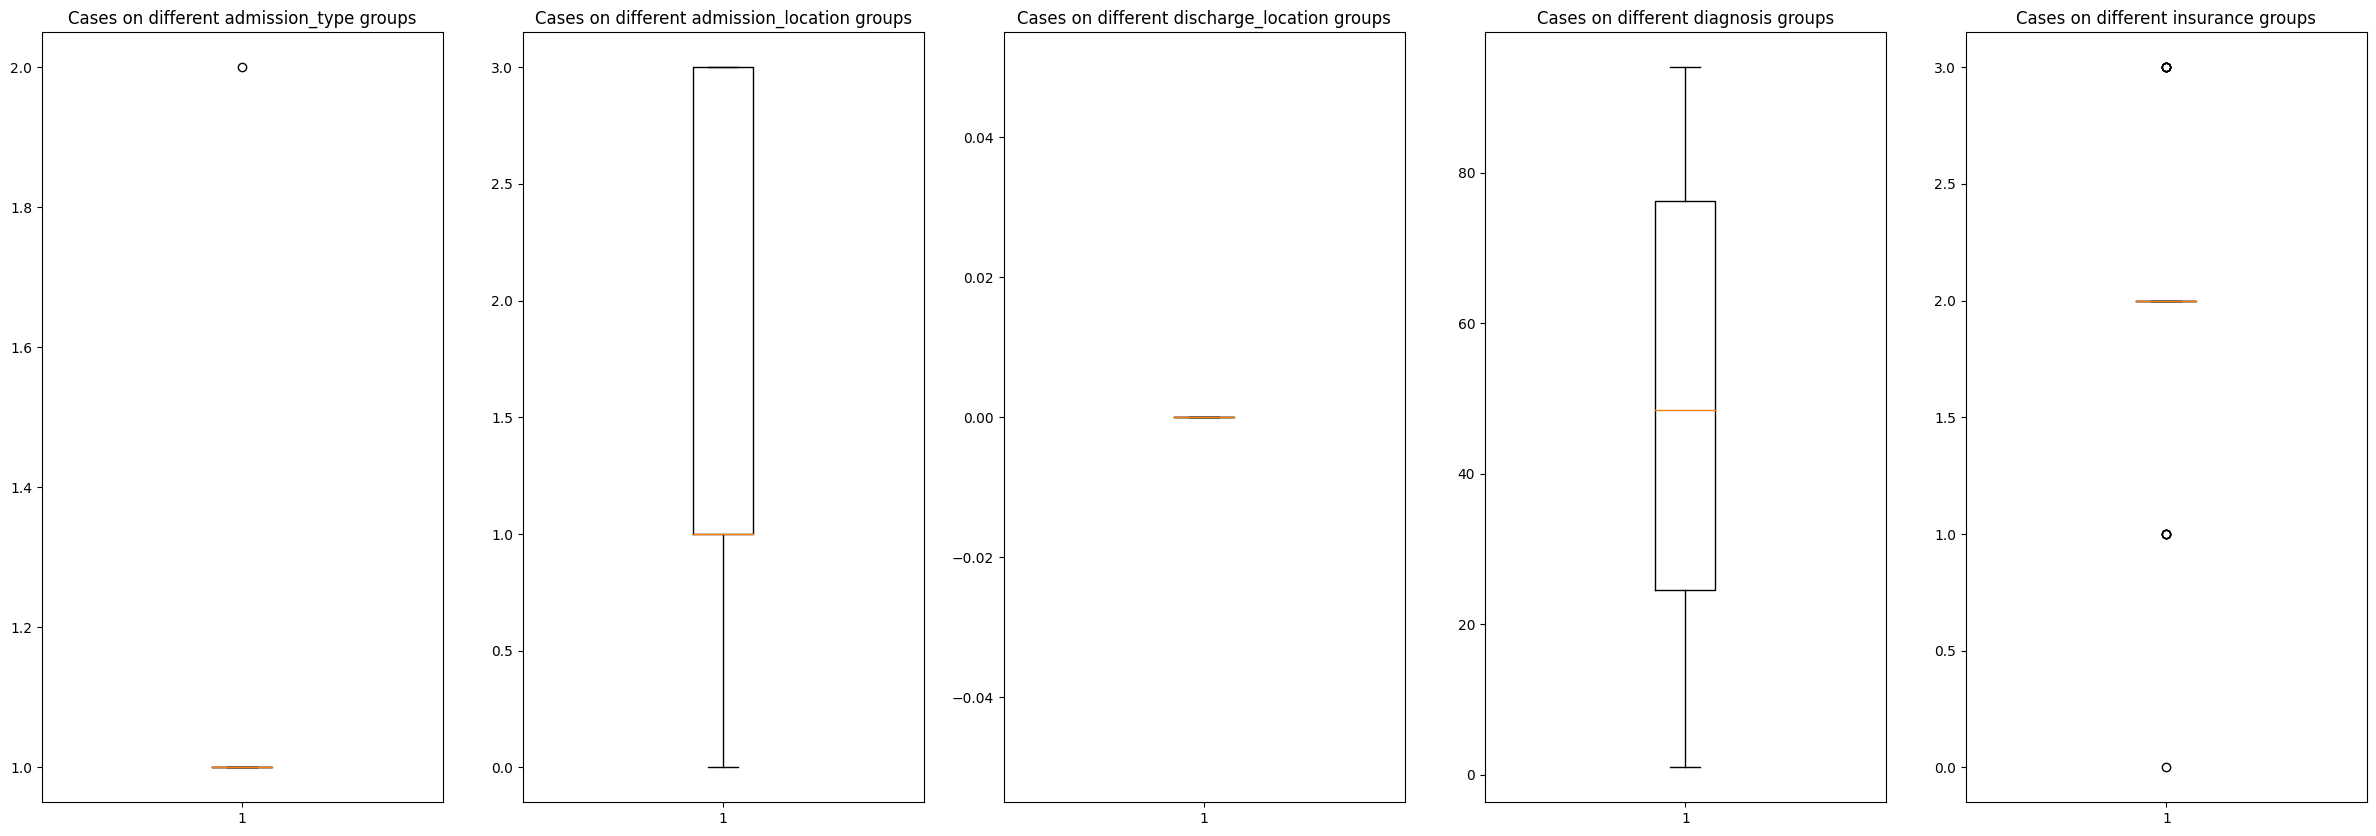

In [5]:
fig, axs = plt.subplots(1, 5, figsize=(30, 10))

count = 0
for feature in ['admission_type', 'admission_location', 'discharge_location', 'diagnosis','insurance']:
    axs[count].boxplot(fallecidos[feature])
    axs[count].set_title(('Cases on different ' +  feature + ' groups'))
    count += 1

plt.show()


<Axes: >

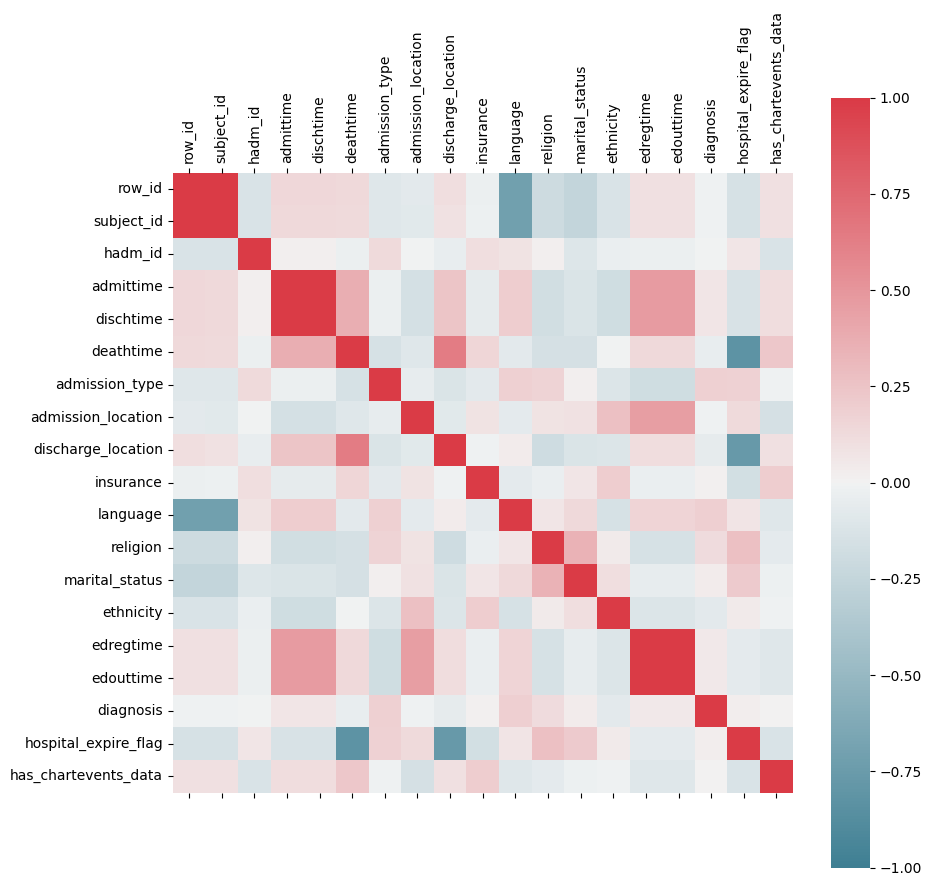

In [6]:
import seaborn as sns
#plt.matshow(df_heart.corr())
#plt.show()
#
corr = df_admin.corr()
fig, ax = plt.subplots(figsize=(10, 10))
ax.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)
sns.heatmap(corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)

## Procesamiento y Modelamiento

Para esta etapa del trabajo es necesario primero descargar e importar la librería lazypredict. A partir de esta se obtendrán modelos junto a sus valores más característicos para así escoger el más conveniente.

In [7]:
# Descarga e importanción de lazypredict

!gdown https://drive.google.com/uc?id=1KcIESuPAZilpnDAPKStt12g-KC3xpJcy
!pip -q install lazypredict

'gdown' is not recognized as an internal or external command,
operable program or batch file.


### Escalamiento de los datos

Se utilizará un scaler para procesar la información. Para esto se trabajará con el dataset procesado al que se le han aplicado labels, se utiliza la variable 'df_admin'

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Separamos del dataset el target para posteriormente entrenar la red neuronal

X = df_admin.drop(['hospital_expire_flag'], axis=1)
y = df_admin['hospital_expire_flag']

data_normalized = scaler.fit_transform(X)

# Convertir el resultado a un nuevo dataframe
X = pd.DataFrame(data_normalized, columns=X.columns)

### Entrenamiento del dataset

Para entrenar la red neuronal se tomará al 20% de los datos como herramientas para la prueba. Esto se configura directamente en la función train_test_split()

In [9]:
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =123, test_size=0.2)
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)

models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 29/29 [00:00<00:00, 50.33it/s]

[LightGBM] [Info] Number of positive: 30, number of negative: 73
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000300 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 319
[LightGBM] [Info] Number of data points in the train set: 103, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.291262 -> initscore=-0.889262
[LightGBM] [Info] Start training from score -0.889262
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
AdaBoostClassifier,1.00,1.00,1.00,1.00,0.01
LinearDiscriminantAnalysis,1.00,1.00,1.00,1.00,0.01
XGBClassifier,1.00,1.00,1.00,1.00,0.04
SGDClassifier,1.00,1.00,1.00,1.00,0.01
RidgeClassifierCV,1.00,1.00,1.00,1.00,0.01
RidgeClassifier,1.00,1.00,1.00,1.00,0.01
RandomForestClassifier,1.00,1.00,1.00,1.00,0.08
PassiveAggressiveClassifier,1.00,1.00,1.00,1.00,0.01
LogisticRegression,1.00,1.00,1.00,1.00,0.01


Con el propósito del trabajo. Utilizaremos un modelo clásico de KNN (KNeighborsClassifier). También emplearemos un modelo Gaussiano (GaussianNB). Un modelo DecisionTreeClassifier. Un modelo Random Forest. Y finalmente, un modelo XGBoost.

### Modelo KNeigborsClassifier

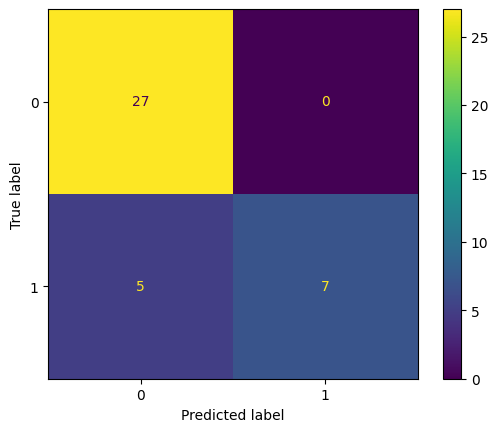

El valor de precision obtenido es de
Accuracy: 0.87
              precision    recall  f1-score   support

           0       0.84      1.00      0.92        27
           1       1.00      0.58      0.74        12

    accuracy                           0.87        39
   macro avg       0.92      0.79      0.83        39
weighted avg       0.89      0.87      0.86        39



In [10]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

scaler=StandardScaler()

x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

model=KNeighborsClassifier()
model.fit(x_train,y_train)

y_pred=model.predict(x_test)

confusion_matrix(y_test, y_pred, labels=[0,1])

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.show()
# Evaluate the model
rf_score = model.score(x_test, y_test)
print('El valor de precision obtenido es de')
print(f"Accuracy: {rf_score:.2f}")
from sklearn.metrics import classification_report
print(classification_report(y_test,model.predict(x_test)))

### Modelo GaussianNB

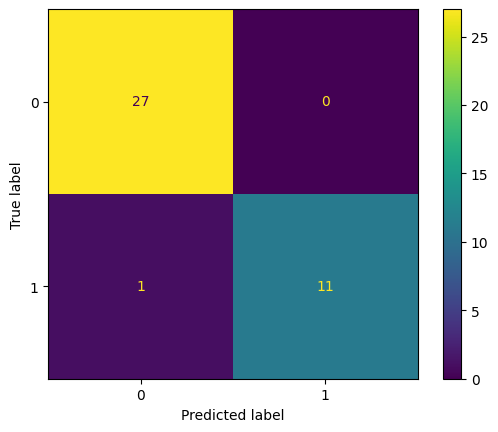

El valor de precision obtenido es de
Accuracy: 0.97
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       1.00      0.92      0.96        12

    accuracy                           0.97        39
   macro avg       0.98      0.96      0.97        39
weighted avg       0.98      0.97      0.97        39



In [11]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

scaler=StandardScaler()

x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

model=GaussianNB()
model.fit(x_train,y_train)

y_pred=model.predict(x_test)

confusion_matrix(y_test, y_pred, labels=[0,1])

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.show()
# Evaluate the model
rf_score = model.score(x_test, y_test)
print('El valor de precision obtenido es de')
print(f"Accuracy: {rf_score:.2f}")
from sklearn.metrics import classification_report
print(classification_report(y_test,model.predict(x_test)))

### Modelo DecisionTreeClassifier

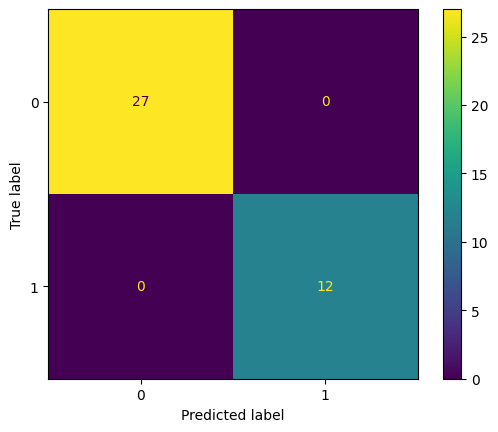

El valor de precision obtenido es de
Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        12

    accuracy                           1.00        39
   macro avg       1.00      1.00      1.00        39
weighted avg       1.00      1.00      1.00        39



In [12]:
from sklearn.tree import DecisionTreeClassifier
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

scaler=StandardScaler()

x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

model=DecisionTreeClassifier()
model.fit(x_train,y_train)

y_pred=model.predict(x_test)

confusion_matrix(y_test, y_pred, labels=[0,1])

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.show()
# Evaluate the model
rf_score = model.score(x_test, y_test)
print('El valor de precision obtenido es de')
print(f"Accuracy: {rf_score:.2f}")
from sklearn.metrics import classification_report
print(classification_report(y_test,model.predict(x_test)))

### Modelo RandomForest

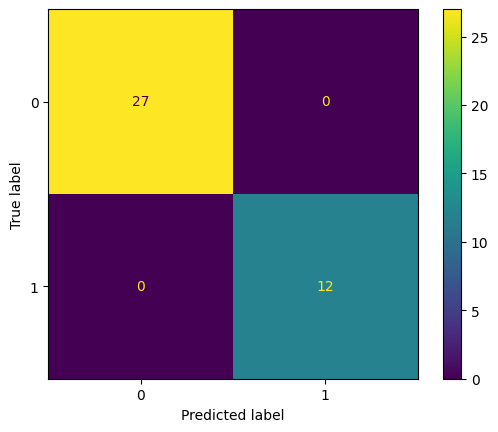

El valor de precision obtenido es de
Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        12

    accuracy                           1.00        39
   macro avg       1.00      1.00      1.00        39
weighted avg       1.00      1.00      1.00        39



In [13]:
from sklearn.ensemble import RandomForestClassifier

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

scaler=StandardScaler()

x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

model=RandomForestClassifier()
model.fit(x_train,y_train)

y_pred=model.predict(x_test)

confusion_matrix(y_test, y_pred, labels=[0,1])

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.show()
# Evaluate the model
rf_score = model.score(x_test, y_test)
print('El valor de precision obtenido es de')
print(f"Accuracy: {rf_score:.2f}")
from sklearn.metrics import classification_report
print(classification_report(y_test,model.predict(x_test)))

### Modelo XGBoost

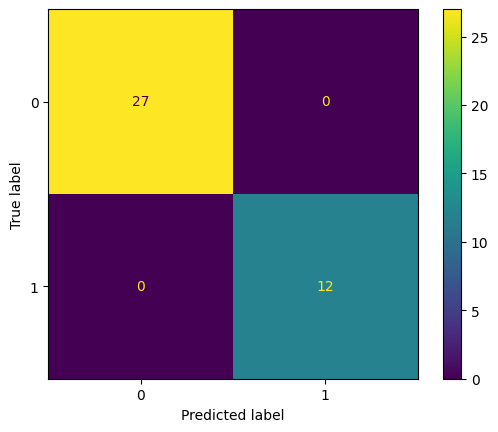

El valor de precision obtenido es de
Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        12

    accuracy                           1.00        39
   macro avg       1.00      1.00      1.00        39
weighted avg       1.00      1.00      1.00        39



In [14]:
import xgboost as xgb

from sklearn.ensemble import RandomForestClassifier

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

scaler=StandardScaler()

x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

model = xgb.XGBClassifier(n_estimators=10, max_depth=10, learning_rate=1, objective='binary:logistic')
model.fit(x_train,y_train)

y_pred=model.predict(x_test)

confusion_matrix(y_test, y_pred, labels=[0,1])

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.show()
# Evaluate the model
rf_score = model.score(x_test, y_test)
print('El valor de precision obtenido es de')
print(f"Accuracy: {rf_score:.2f}")
from sklearn.metrics import classification_report
print(classification_report(y_test,model.predict(x_test)))